# 1° Gerando série temporal de precipitação com os dados da Agência Nacional de Águas e Saneamento Básico (ANA)


In [ ]:
# Baixa as bibliotecas para requisitar os dados
!pip install hydrobr
!pip install seaborn
!pip install plotly

  Preparing metadata (setup.py) ... done
  Created wheel for hydrobr: filename=hydrobr-0.1.1-py3-none-any.whl size=15071 sha256=ce20b7934f3a00f2b451f2d084b05f3db776dfd884013a94f7020e91d4872b36
  Stored in directory: /root/.cache/pip/wheels/44/9b/89/8fd8f9bf127ee2c08c7fb9c31520f5a80d238702bdd8fd8cd0
Successfully built hydrobr


In [ ]:
# Importa as bibliotecas
import pandas as pd
import hydrobr
from matplotlib import pyplot
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image
import seaborn as sns

In [ ]:
# Lista os dados da ANA de precipitação das estações
Lista_estacoes = hydrobr.get_data.ANA.list_prec_stations()
Lista_estacoes.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


In [ ]:
# Filtra pra as estações de São Paulo
lista_estacao_city = Lista_estacoes[Lista_estacoes.City== "SÃO PAULO"]
lista_estacao_city

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
9217,PERUS,02346027,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.4000,-46.7500,1936/10/09,1997/09/25,62,11.6,32,48.4
9221,CANTAREIRA (SABESP),02346031,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.4500,-46.6167,1940/10/01,1969/12/30,30,3.9,21,30.0
9222,HORTO FLORESTAL,02346032,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.4667,-46.6333,1899/01/01,2003/10/09,105,33.8,56,46.7
9224,BARROCADA,02346034,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.4167,-46.5667,1940/11/01,1998/06/30,59,0.2,52,11.9
9225,ENGORDADOR,02346035,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.4000,-46.5833,1940/10/01,1997/07/31,58,0.8,48,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,VILA CARRÃO,02346397,2,62,SÃO PAULO,SÃO PAULO,ANA,-23.5500,-46.5167,1981/06/13,1991/02/22,11,0.5,8,27.3
9496,PIRAJUCARA,02346398,2,62,SÃO PAULO,SÃO PAULO,ANA,-23.6500,-46.7833,1981/06/16,1990/12/05,10,4.0,2,80.0
9506,ETD - PINHEIROS,02346412,2,62,SÃO PAULO,SÃO PAULO,EMAE,-23.5833,-46.7167,1985/09/06,1986/06/30,2,0.3,0,100.0
9507,ETD - GUMERCINDO,02346413,2,62,SÃO PAULO,SÃO PAULO,EMAE,-23.6167,-46.6167,1983/10/01,1986/06/30,4,0.8,1,75.0


In [ ]:
# Filtra para a estação CIDADE UNIVERSITÁRIA
estacao_CDU = lista_estacao_city[lista_estacao_city.Name=='CTH - CIDADE UNIVERSITÁRIA.']
codigo_da_estacao_CDU = estacao_CDU.Code.to_list()
codigo_da_estacao_CDU

['02346047']

In [ ]:
# Baixando os dados da estação CIDADE UNIVERSITÁRIA
data_estacao_CDU = hydrobr.get_data.ANA.prec_data(codigo_da_estacao_CDU)

100%|██████████| 1/1 [00:10<00:00, 10.82s/it]


In [ ]:
# Apresenta Informações sobre os dados
data_estacao_CDU.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21581 entries, 1955-01-01 to 2014-01-31
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   02346047  1214 non-null   float64
dtypes: float64(1)
memory usage: 337.2 KB


In [ ]:
#Gera um grafico com os dados existentes para a estação CIDADE UNIVERSITÁRIA no pela ANA

graf_data_exist = hydrobr.Plot.gantt(data_estacao_CDU)
graf_data_exist.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Anos',
    yaxis_title = 'Estação CIDADE UNIVERSITÁRIA',
    font = dict(family = 'Arial', size = 9))
graf_data_exist

In [ ]:
# Organiza os dados da estação CIDADE UNIVERSITÁRIA pela data
data_estacao_CDU_index = data_estacao_CDU.reset_index()
data_estacao_CDU_index

,index,02346047
0,1955-11-01,0.0
1,1955-11-02,0.0
2,1955-11-03,0.0
3,1955-11-04,0.0
4,1955-11-05,0.0
...,...,...
21606,2014-12-27,NaN
21607,2014-12-28,NaN
21608,2014-12-29,NaN
21609,2014-12-30,98.8


Text(0, 0.5, 'Precipitação (mm/dia)')

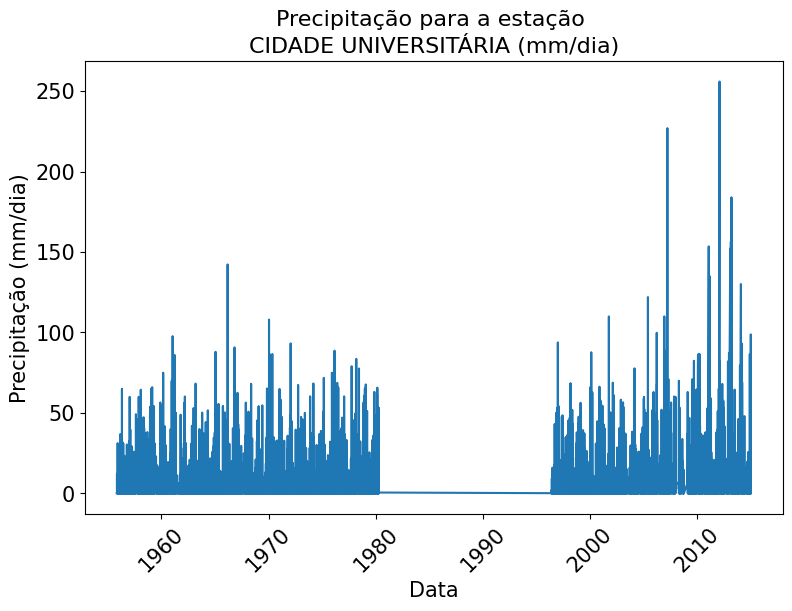

In [ ]:
# Gera um grafico com os dados de precipitação
fig, ax = plt.subplots(1,1,figsize=(9,6),dpi=100)

plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
sns.lineplot(x='index',y='02346047',data=data_estacao_CDU_index)
plt.title( 'Precipitação para a estação \nCIDADE UNIVERSITÁRIA (mm/dia)',fontsize=16)
plt.xlabel('Data',fontsize=15)
plt.ylabel('Precipitação (mm/dia)',fontsize=15)

# 2° Gerando gráficos de acumulado anuais e médias mensais, com os dados do Instituto Nacional de Meteorologia - INMET


In [ ]:
# Baixa as bibliotecas para requisitar os dados
!pip install hydrobr

In [ ]:
import hydrobr
import os
import plotly.offline
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import requests
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baixa os dados anuais de todas as variaveis disponiveis (Com possibilidade de baixar em varios anos)
ANO = '2019'
url = f"https://portal.inmet.gov.br/uploads/dadoshistoricos/{ANO}.zip"
endereco = f"/content/dadoshistoricos_{ANO}.zip"
# faz requisição ao servidor
resposta = requests.get(url)
if resposta.status_code == requests.codes.OK:
    with open(endereco, 'wb') as novo_arquivo:
        novo_arquivo.write(resposta.content)
else:
    resposta.raise_for_status()

In [ ]:
# Lista as estações do INMET
lista_estacoes_INMET = hydrobr.get_data.INMET.list_stations()
lista_estacao_INMET_city = lista_estacoes_INMET[lista_estacoes_INMET.Name== "ITAPEVA"]
lista_estacao_INMET_city


/usr/local/lib/python3.10/dist-packages/hydrobr/get_data.py:301: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/hydrobr/get_data.py:309: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation
248,A714,Automatic,ITAPEVA,SP,-23.98194443,-48.88583333,743.33,2006-07-24 21:00:00-03:00,In operation


In [ ]:
# Colocar as informações que estão entre alterar
### ALTERAR AS LINHAS ABAIXO ###
Regiao = 'SE'             #*
UF = 'SP'                 #*
cod_estacao = 'D2445'      #*
nome_estacao = 'ITAPEVA'  #*
estado_estacao = 'São Paulo'
### ALTERAR AS LINHAS ACIMA ATÉ AQUI ###
estacao_escolhida = f'INMET_{Regiao}_{UF}_{cod_estacao}_{nome_estacao}_01-01-{ANO}_A_31-12-{ANO}.CSV'
estacao_escolhida

'INMET_SE_SP_D2445_ITAPEVA_01-01-2019_A_31-12-2019.CSV'

In [ ]:
# Abre e le os dados da estação escolhida para o ano baixado sem descompactar o arquivo .zip
with zipfile.ZipFile(endereco) as z:
  with z.open(estacao_escolhida) as f:
    ds = pd.read_csv(f,sep=';', skiprows=8,error_bad_lines=False,encoding="ISO-8859-1")
lugar = f'{nome_estacao}, {estado_estacao} - {UF} ({cod_estacao})'

KeyError: "There is no item named 'INMET_SE_SP_D2445_ITAPEVA_01-01-2019_A_31-12-2019.CSV' in the archive"

### Definições de funções para plotagem dos graficos

## Funções de dias e medias



In [ ]:
# Lista as datas do arquivo e agrupa os dias
datas = list(ds["Data"])
datas_um_dia = []
i=0
j=1
while i <= len(datas):
  while datas[i] == datas[j] or j < i:
    datai = datas[i]
    j+=1
    if j >= 8759:
      break
  datas_um_dia.append(datai)
  if j >= 8759:
    break
  elif i >= 8759:
    break
  else:
    i = j

# Separa mês
Meses = {}
i=0
j=1
while i <= (len(datas_um_dia)):
  while int(datas_um_dia[i][5:7]) == int(datas_um_dia[j][5:7]):
    mes = datas_um_dia[i][5:7]
    diaf_do_mes = datas_um_dia[j][8:]
    j+=1
    if j >= 365:
      break
  Meses.update({mes:diaf_do_mes})
  if j >= 365:
    break
  elif i >= 365:
    break
  else:
    i = j

## Definições
def Agrupa_var_e_dia(lista_variavel:list, lista_datas:list):
  global var_data
  var_data = []
  Troca_virg_por_pto_(lista_variavel)
  valoresnan = 0
  for i in range(len(lista_variavel)):
    if np.isnan(lista_variavel[i]) == False:
      var_data.append((lista_datas[i],lista_variavel[i]))
    if np.isnan(lista_variavel[i]) == True:
      valoresnan += 1
  return (valoresnan)

def Troca_virg_por_pto_(lista_dataset: list):
    for i in range(len(lista_dataset)):
      try:
        lista_dataset[i] = float(lista_dataset[i].replace(",","."))
      except AttributeError:
        lista_dataset[i] = float(lista_dataset[i])

def Tira_nan(lista_dataset: list, intervalo_inicial:int, intervalo_final:int):
  global nan
  nan = 0.919191
  for i in range(len(lista_dataset[intervalo_inicial:intervalo_final+1])):
    try:
      lista_dataset[i+intervalo_inicial] = float(lista_dataset[i+intervalo_inicial].replace(",","."))
    except AttributeError:
      lista_dataset[i+intervalo_inicial] = float(lista_dataset[i+intervalo_inicial])

  for i in range(len(lista_dataset[intervalo_inicial:intervalo_final+1])):
    lista_dataset[i+intervalo_inicial] = float(lista_dataset[i+intervalo_inicial])
    if np.isnan(lista_dataset[i+intervalo_inicial]) == True:
      lista_dataset[i+intervalo_inicial] = nan
  return "lista sem nan e valores em 'float'"

def Cont_nan(lista_dataset: list, intervalo_inicial:int, intervalo_final:int):
  global valores_de_nan
  valores_de_nan = 0
  for i in lista_dataset[intervalo_inicial:intervalo_final+1]:
    if i == nan:
      valores_de_nan += 1

def Cont_meses(lista:list) -> dict:
  global meses
  meses = {}
  k = 1
  for i in range(len(lista)):
    dias_do_mes = 0
    while k<len(lista) and int(lista[i][0][5:7]) == int(lista[k][0][5:7]):
      mes = lista[k][0][5:7]
      dias_do_mes += 1
      h = dias_do_mes
      k += 1
    if mes == 12:
      meses.update({int(mes):h+1})
    else:
      meses.update({int(mes):h})

def Media_entre_var(lista_1:list,lista_2):
  global media_entre
  media_entre = []
  for i in range(len(lista_1)):
    if lista_1[i][0] == lista_2[i][0]:
      media = (int(lista_1[i][1]) + int(lista_2[i][1]))/2
      media_entre.append((lista_1[i][0],media))

def Acumulados_por_dia(lista:list) -> list:
  global acumulado_por_dia
  acumulado_por_dia = []
  d = 0
  for i in datas_um_dia:
    acumulado_dia = 0
    a = 0
    Tira_nan(lista,d,d+24)
    Cont_nan(lista,d,d+24)
    while d < 8760 and i == datas[d]:
      acumulado_dia += (lista[d])
      d += 1
      a += 1
    acumulado_dia -= nan*valores_de_nan
    if acumulado_dia < 0:
      acumulado_dia = 0
    acumulado_por_dia.append(str(acumulado_dia))

def Acumulados_por_mes(lista:list)->list:
  global acumulado_por_mes
  acumulado_por_mes = []
  int_inicial = 0
  k = 0
  for i in Meses:
    int_final = int_inicial + int(Meses[i])
    acumulado_mes = 0
    a = 1
    while k<len(acumulado_por_dia) and k < int_final:
      acumulado_mes += float(acumulado_por_dia[k])
      k += 1
      a += 1
    if acumulado_mes < 0:
      acumulado_mes = 0
    acumulado_por_mes.append(acumulado_mes)
    int_inicial = int_final
def Medias_por_mes(lista:list):
  global media_por_mes
  media_por_mes = []
  int_inicial = 0
  k = 0
  lista_meses = [1,2,3,4,5,6,7,8,9,10,11,12]
  Cont_meses(lista)
  global meses
  for i in lista_meses:
    acumulado_mes = 0
    a = 0
    mes = list(meses)
    if bool(i in mes) == True:
      int_final = int_inicial + int(meses[i])
      while k < int_final:
        acumulado_mes += lista[k][1]
        k += 1
        a += 1
      media_mes = acumulado_mes/a
      int_inicial = int_final
    else:
      media_mes = float("nan")
    media_por_mes.append(media_mes)

In [ ]:
### ACUMULADOS ###

# Precipitação
# Tira a precipitacao da planilha e soma o dia
precipitacao = list(ds["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"])
Acumulados_por_dia(precipitacao)
acumulado_precipitacao_por_dia = acumulado_por_dia

# Acumulado de Precipitacao mensal (soma as precipitações de um mes)
Acumulados_por_mes(acumulado_precipitacao_por_dia)
acumulado_precipitacao_por_mes = acumulado_por_mes

# RADIACAO GLOBAL (Kj/m²)
# Tira a RADIACAO GLOBAL (Kj/m²) da planilha e soma o dia
radiacao = list(ds["RADIACAO GLOBAL (Kj/m²)"])
Acumulados_por_dia(radiacao)
acumulado_radiacao_dia = acumulado_por_dia

# Acumulado de Radiação (soma as precipitações de um mes)
Acumulados_por_mes(acumulado_radiacao_dia)
acumulado_radiacao_por_mes = acumulado_por_mes


### MEDIAS ###

## PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)
# Tira a PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO da planilha e soma o dia
pressao = list(ds["PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)"])
Agrupa_var_e_dia(pressao,datas)
Medias_por_mes(var_data)
# Media mensal de PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO (mB)
media_pressao_por_mes = media_por_mes
meses_pressao = meses

## TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)
# Tira a TEMPERATURA DO AR - BULBO SECO da planilha e faz a media do dia
temperatura_ar = list(ds["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"])
Agrupa_var_e_dia(temperatura_ar,datas)
Medias_por_mes(var_data)
# Media mensal de TEMPERATURA DO AR - BULBO SECO (°C)
media_temperatura_ar_por_mes = media_por_mes
meses_temperatura_ar = meses


## TEMPERATURA DO PONTO DE ORVALHO (°C)
# Tira a TEMPERATURA DO PONTO DE ORVALHO (°C) da planilha e faz a media do dia
temperatura_pont_orvalho = list(ds["TEMPERATURA DO PONTO DE ORVALHO (°C)"])
Agrupa_var_e_dia(temperatura_pont_orvalho,datas)
Medias_por_mes(var_data)
# Media mensal de TEMPERATURA DO PONTO DE ORVALHO (°C)
media_temperatura_pont_orvalho_por_mes = media_por_mes
meses_temperatura_pont_orvalho = meses

## TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)
# Tira a TEMPERATURA MÁXIMA NA HORA ANT da planilha e faz a media do dia
temperatura_max = list(ds["TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)"])
Agrupa_var_e_dia(temperatura_max,datas)
Medias_por_mes(var_data)
# Media mensal de TEMPERATURA MÁXIMA NA HORA ANT
media_temperatura_max_por_mes = media_por_mes
meses_temperatura_max = meses

## TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)
# Tira a TEMPERATURA MÁXIMA NA HORA ANT da planilha e faz a media do dia
temperatura_min = list(ds["TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)"])
Agrupa_var_e_dia(temperatura_min,datas)
Medias_por_mes(var_data)
# Media mensal de TEMPERATURA MÁXIMA NA HORA ANT
media_temperatura_min_por_mes = media_por_mes
meses_temperatura_min = meses

## TEMPERATURA MÉDIA
Agrupa_var_e_dia(temperatura_max,datas)
Temperatura_max_com_data = var_data
Agrupa_var_e_dia(temperatura_max,datas)
Temperatura_min_com_data = var_data
Media_entre_var(Temperatura_max_com_data,Temperatura_min_com_data)
Medias_por_mes(media_entre)

media_temperatura_media_por_mes = media_por_mes
meses_temperatura_media = meses


## Graficos gerados com o script

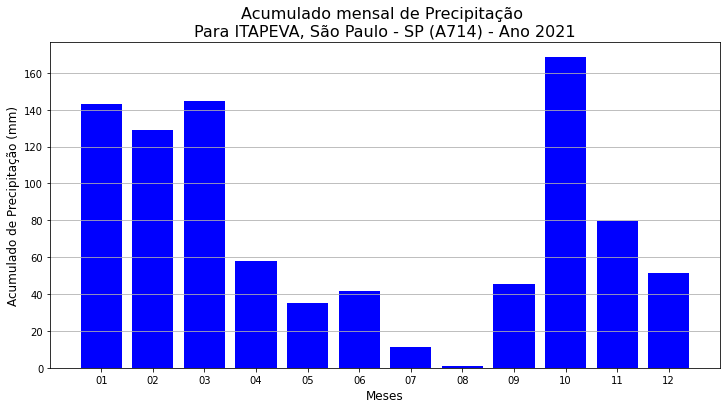

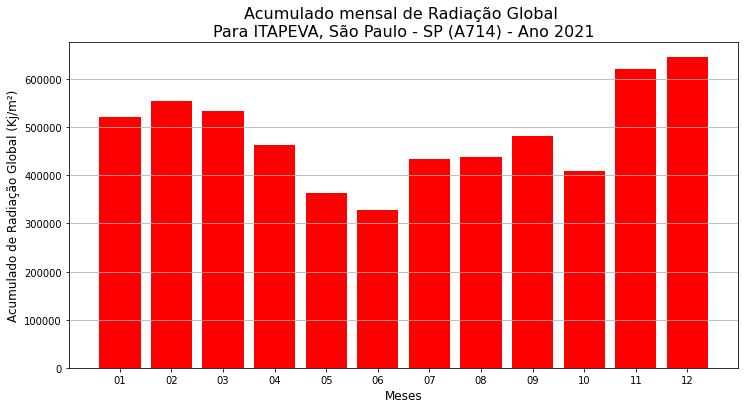

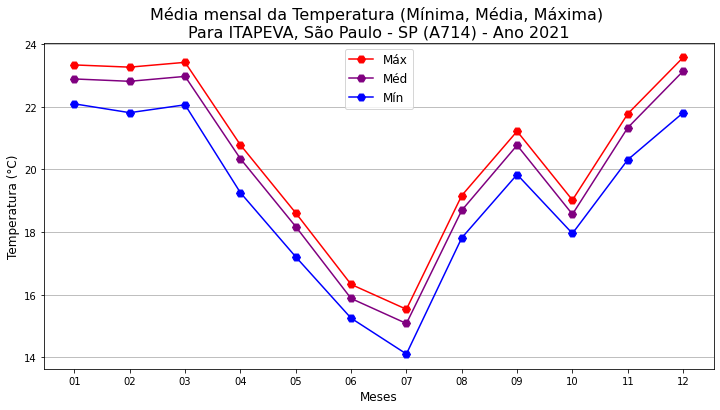

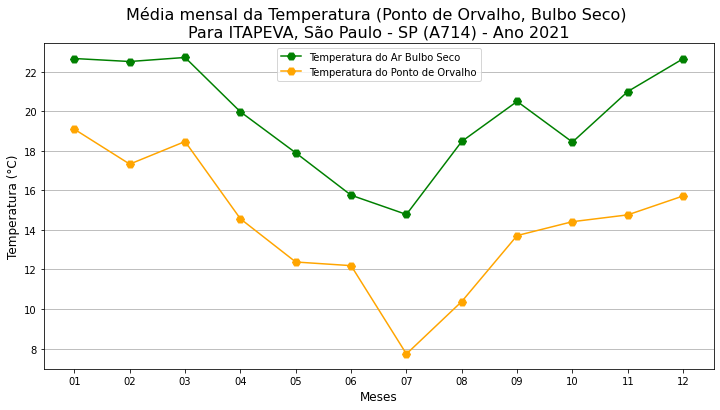

In [ ]:
# Tamanho do gráfico
i = 12
j = 6

fig1 = plt.figure(figsize=(i,j))
plt.bar(list(Meses),acumulado_precipitacao_por_mes, color = 'b')
plt.grid(b=None, which='major', axis='y')
plt.title(f"Acumulado mensal de Precipitação \nPara {lugar} - Ano {ANO}",fontsize = 16)
plt.xlabel("Meses",fontsize = 12)
plt.ylabel("Acumulado de Precipitação (mm)",fontsize = 12)

#fig1.savefig(pathout + f"Precipitação_{lugar}_{ANO}")

fig2 = plt.figure(figsize=(i,j))
plt.bar(list(Meses),acumulado_radiacao_por_mes, color = 'r')
plt.grid(b=None, which='major', axis='y')
plt.title(f"Acumulado mensal de Radiação Global \nPara {lugar} - Ano {ANO}",fontsize = 16)
plt.xlabel("Meses",fontsize = 12)
plt.ylabel("Acumulado de Radiação Global (Kj/m²)",fontsize = 12)

#fig2.savefig(pathout + f"Radiação Global_{lugar}_{ANO}")

fig3 = plt.figure(figsize=(i,j))
plt.grid(b=None, which='major', axis='y')
plt.title(f"Média mensal da Temperatura (Mínima, Média, Máxima) \nPara {lugar} - Ano {ANO}",fontsize = 16)
plt.xlabel("Meses",fontsize = 12)
plt.ylabel("Temperatura (°C)",fontsize = 12)
plt.plot(list(Meses),media_temperatura_max_por_mes, color = 'r',marker ="H", markersize = 8)
plt.plot(list(Meses),media_temperatura_media_por_mes, color = 'purple',marker ="H", markersize = 8)
plt.plot(list(Meses),media_temperatura_min_por_mes, color = 'b',marker ="H", markersize = 8)
plt.legend(["Máx","Méd","Mín"],loc=9,fontsize=12 )

#fig3.savefig(pathout + f"Temperatura_min_med_max_{lugar}_{ANO}")

fig4 = plt.figure(figsize=(i,j))
plt.plot(list(Meses),media_temperatura_ar_por_mes, color = 'g',marker ="H",markersize = 8)
plt.grid(b=None, which='major', axis='y')
plt.title(f"Média mensal da Temperatura (Ponto de Orvalho, Bulbo Seco) \nPara {lugar} - Ano {ANO}",fontsize = 16)
plt.xlabel("Meses",fontsize = 12)
plt.ylabel("Temperatura (°C)",fontsize = 12)
plt.plot(list(Meses),media_temperatura_pont_orvalho_por_mes, color = 'orange',marker ="H",markersize = 8)
plt.legend(["Temperatura do Ar Bulbo Seco","Temperatura do Ponto de Orvalho"],loc=9,fontsize=10 )

#fig4.savefig(pathout + f"Temperatura_Ponto de Orvalho_Bulbo Seco_{lugar}_{ANO}")

# 3° Grafico de precipitação (mm) [MERGE] média em 6 horas com ventos de 250 (hPa) [ERA5]

In [ ]:
!pip install netcdf4
!pip uninstall -y shapely
!pip install -q netcdf4
!pip install shapely cartopy --no-binary shapely --no-binary cartopy
!pip install pygrib

In [ ]:
# Pacotes de processamento de dados
import xarray as xr
import numpy as np
# Pacote para ler e processar dados grib
import pygrib
import netCDF4 as nc
# Pacotes para gerar mapas
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # Pacote para mapas (sistema de referência cooordenado)
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import requests
import os
def baixar_arquivo(url, endereco):
    # faz requisição ao servidor
    resposta = requests.get(url)

    if resposta.status_code == requests.codes.OK:
        with open(endereco, 'wb') as novo_arquivo:
            novo_arquivo.write(resposta.content)
    else:
        resposta.raise_for_status()

dialista = ['04','05','06']
mes = '12'
ano = '2019'

for dia in dialista:
  horautc=[]
  for i in range(24):
    if 0<=i<=9:
      hora = f'0{i}'
    if 10<=i<=24:
      hora = f'{i}'
    horautc.append(hora)
  endereco = '/content/drive/MyDrive/'
  horautc_existente = os.listdir(endereco)
  horautc_existente.sort()
  for k in range(len((horautc_existente))):
    if horautc_existente[k][-6:] == '.grib2':
      if horautc_existente[k][-16:-8] == f"{ano}{mes}{dia}":
        del horautc[horautc.index(horautc_existente[k][-8:-6])]
  x=0
  for horario in horautc:
    try:
      nome_arq = f'MERGE_CPTEC__{ano}{mes}{dia}{horautc[horautc.index(horario)]}.grib2'
      nome_arquivo = os.path.join(endereco, nome_arq)
      urlbase = f'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/{ano}/{mes}/{dia}/MERGE_CPTEC_{ano}{mes}{dia}{horario}.grib2'
      baixar_arquivo(urlbase, nome_arquivo)
      x+=1
      print(f'Arquivo baixado {nome_arq}')
    except:
      print(f"erro com url para o horario {horario}")
  print(f"Total de arquivos baixados: {x} do dia {dia}")

In [ ]:
# Precipitation a cada 6 horas
def MERGE(periodo):
  ds = pygrib.open('/content/drive/MyDrive/MERGE_CPTEC__2019120412.grib2')

  var = 'Precipitation'
  ano = '2019'
  mes = '12'
  dia = '05'
  level = 250
  if periodo == 6 or periodo == 00:
    tempo = f'{ano}-{mes}-{dia}T0{str(periodo)}:00:00'
  else:
    tempo = f'{ano}-{mes}-{dia}T{str(periodo)}:00:00'
  cor_do_mapa = 'dimgray'

  variavel = ds.select(name = var)[0]
  path = "/content/drive/MyDrive/Tempestades_severas/adaptor.mars.internal-1659578869.1850169-27871-2-a0c2e0ab-88ca-4a72-b1e3-035e031ec9fc.nc"
  das = xr.open_dataset(path)
  # Fazendo a transformação do formato das longitudes de 0 a 360º para -180º a +180º
  das.coords['longitude'] = (das.coords['longitude'] + 180) % 360 - 180
  # Ordenando o dataset baseado no novo formato da longitude -180º a +180º
  das = das.sortby(das.longitude)

  # Obter informação do arquivo grib
  print(" Informação do arquivo grib")
  init  = str(variavel.analDate)      # Init date / time
  run   = str(variavel.hour).zfill(2) # Run
  ftime = str(variavel.forecastTime)  # Forecast hour
  valid = str(variavel.validDate)     # Valid date / time
  print(ano+'-'+mes +'-'+dia+'T'+ str(periodo) + ':00 UTC')
  print('Run: ' + run + 'Z')
  #print('Forecast: +' + ftime)
  print(f'Valid: {tempo}UTC')
  range_de_cores = {'Pressure reduced to MSL':(980,1040,4),'Precipitation':(0,70,1)}
  titulo_var = {'Pressure reduced to MSL':('Pressão de Superfície','hPa'),
                'Precipitation':('Precipitação acumulada em 6 horas','mm')}

  # Seleccionar a extensão de nosso mapa
  lat_min = -55
  lat_max = 10
  lon_min = -85
  lon_max = -30
  # Extensão do mapa
  extent = [lon_min, lat_min, lon_max, lat_max]

  # Retirar as médias
  variaveis = []
  for k in range(0,len(horautc_existente),6):
    if horautc_existente[k][-16:-8] == f"{ano}{mes}{dia}":
      dspasso = pygrib.open(f'/content/drive/MyDrive/{horautc_existente[k]}')
      passo = dspasso.select(name = 'Precipitation')[0]
      passo, lats, lons = passo.data(lat1 = extent[1], lat2 = extent[3], lon1 = extent[0]+360, lon2 = extent[2] + 360)
      soma = passo
      for i in range(1,5,1):
        dspasso = pygrib.open(f'/content/drive/MyDrive/{horautc_existente[i+1]}')
        passo = dspasso.select(name = 'Precipitation')[0]
        passo, lats, lons = passo.data(lat1 = extent[1], lat2 = extent[3], lon1 = extent[0]+360, lon2 = extent[2] + 360)
        soma += passo
      variaveis.append(soma)
  periodo_media = {6:0,12:1,18:2,00:3}
  correcao = {'Pressure reduced to MSL':(variaveis[periodo_media[periodo]]/100),'Precipitation':(variaveis[periodo_media[periodo]])}
  # Transformar unidades de Pa -> hPa
  variavel_corrigida = correcao[var]

  #-----------------------------------------------------------------------------------------------------------
  # Configurar o tamanho da figura (width x height, in inches)
  fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
  #plt.figure(figsize=(10,10))


  # Asignar una projeção ao nosso mapa
  # PlateCarre() <- Projeção cilíndrica equidistante (Quase parecido ao Proj. Mercator)
  ax = plt.axes(projection = ccrs.PlateCarree())

  # Agregar linhas de costa
  ax.coastlines(resolution='10m', color=cor_do_mapa, linewidth=0.8)
  # Agregar os límites entre paises
  ax.add_feature(cfeature.BORDERS, edgecolor=cor_do_mapa, linewidth=0.8)
  # Agregar linhas de grade
  gl = ax.gridlines(crs=ccrs.PlateCarree(), color='black', alpha=1.0, linestyle='--', linewidth=0.25,\
                    xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
  # Apagando as etiquetas de grade da parte sueperior
  gl.top_labels = False
  # Apagando as etiquetas de grade do lado direito
  gl.right_labels = False

  # Agregando os estados do Brasil (mas também agrega os ecb = ax.set_title('Mapa só com a opção [contourf]', size = 22)
  # Lembrar da função <- .cfeature.NaturalEarthFeature()
  states_provinces = cfeature.NaturalEarthFeature(
      category='cultural',
      name='admin_1_states_provinces_lines',
      scale='50m',
      facecolor='none')
  # Agregar os estados do Brasil No primer plot <- .add_feature()
  ax.add_feature(states_provinces, edgecolor=cor_do_mapa,linewidth=0.8)


  if titulo_var[var][1] != 'hPa':
    # Criando um array para a paleta de cores
    colorb=np.arange(range_de_cores[var][0],range_de_cores[var][1],range_de_cores[var][2])
    # Criando um gráfico com o formato de contornos
    cmap = plt.cm.Blues
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmaplist[0] = (0, 0, 0, 0)
    cf = ax.contourf(lons, lats, variavel_corrigida,levels=colorb, extend='both',
                     cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N))

    # Criando um array para a paleta de cores
    cbar = fig.colorbar(cf, shrink = 0.9,orientation='vertical')
    cbar.set_label(label=titulo_var[var][1], size=12, weight='normal')
    cbar.ax.tick_params(labelsize=13)
  elif titulo_var[var][1] == 'hPa':
    levels = np.arange(range_de_cores[var][0],range_de_cores[var][1],range_de_cores[var][2])
    # Plot da variável
    img = ax.contour(lons, lats, variavel_corrigida, colors = 'black', linewidths = 0.7, levels = levels)
    ax.clabel(img, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

  # Fazendo Linhas de vento
  ax.set_extent([lon_min, lon_max, lat_max, lat_min], ccrs.PlateCarree())
  # LINHAS DE CORRENTE
  ax.streamplot(das.longitude, das.latitude, das['u'].sel(time=tempo,level=level).values, das['v'].sel(time=tempo,level=level).values,
                    color='black', transform = ccrs.PlateCarree(),linewidth = 1 ,density=2)

  # VETOR vento
  #ax.quiver(das.longitude, das.latitude, das['u'].sel(time=tempo,level=level).values, das['v'].sel(time=tempo,level=level).values,
  #          width=0.003, regrid_shape=25, color='black', headlength=6, transform=ccrs.PlateCarree())

  # Agregando titulo ao mapa
  plt.title(titulo_var[var][0]+f'\ncom vento de {str(level)} hPa' , fontweight='bold', fontsize=13, loc='left')
  plt.title('[MERGE]\n[ERA5]' , fontweight='bold', fontsize=13,loc='center')
  plt.title(ano+'-'+mes +'-'+dia+' '+ str(list(periodo_media)[list(periodo_media).index(periodo)-1])+'-'+str(tempo[11:])+'UTC',
            fontsize=13, loc='right')
  #-----------------------------------------------------------------------------------------------------------

  # Show the image
  plt.show()

  #fig.savefig('/content/drive/MyDrive/Tempestades_severas/produtos do dia 05 12 2019/MERGE/figuras/'+
  #            titulo_var[var][0]+f'com_vento_de_{str(level)}_hPa'+tempo+'.png', dpi=1000)
  #print(f'figura {tempo} SALVA!!')

 Informação do arquivo grib
2019-12-05T6:00 UTC
Run: 12Z
Valid: 2019-12-05T06:00:00UTC


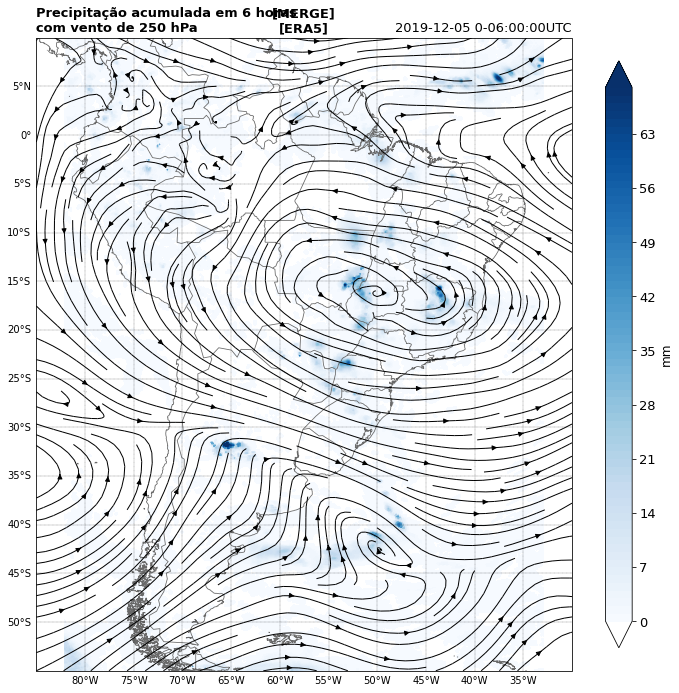

figura 2019-12-05T06:00:00 SALVA!!
 Informação do arquivo grib
2019-12-05T12:00 UTC
Run: 12Z
Valid: 2019-12-05T12:00:00UTC


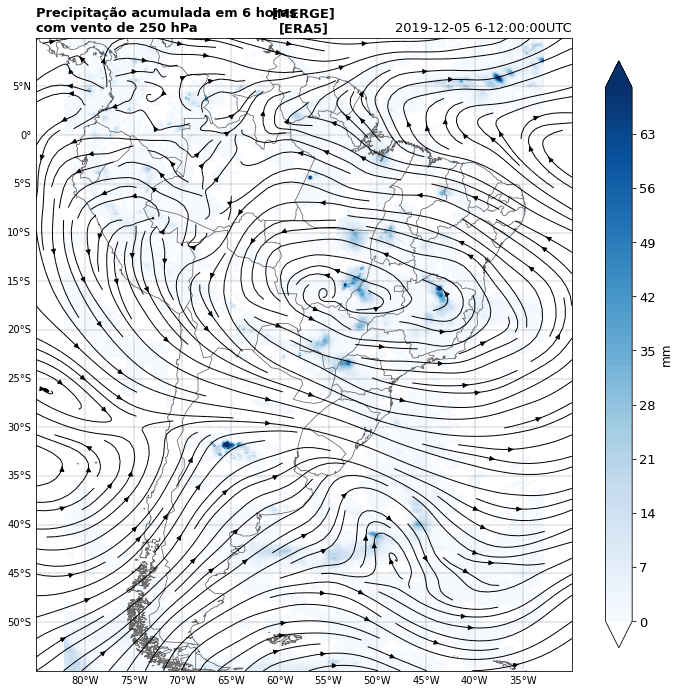

figura 2019-12-05T12:00:00 SALVA!!
 Informação do arquivo grib
2019-12-05T18:00 UTC
Run: 12Z
Valid: 2019-12-05T18:00:00UTC


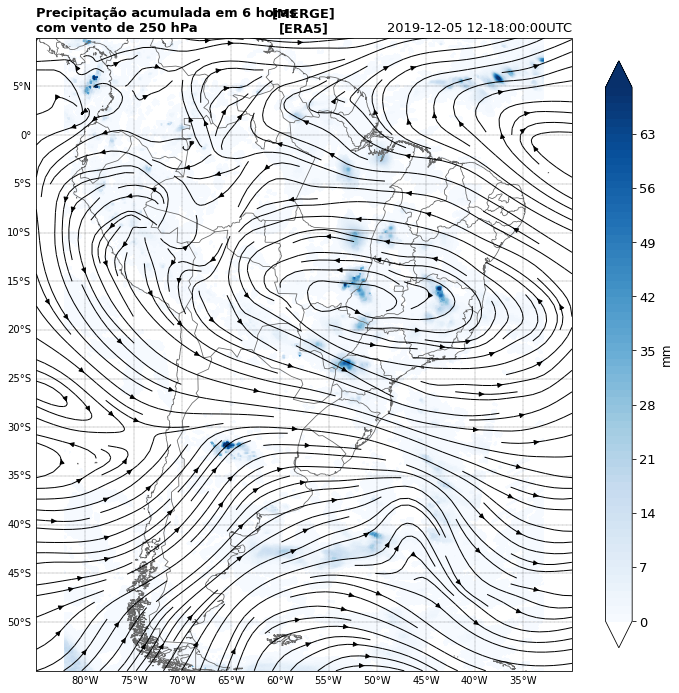

figura 2019-12-05T18:00:00 SALVA!!
 Informação do arquivo grib
2019-12-05T0:00 UTC
Run: 12Z
Valid: 2019-12-05T00:00:00UTC


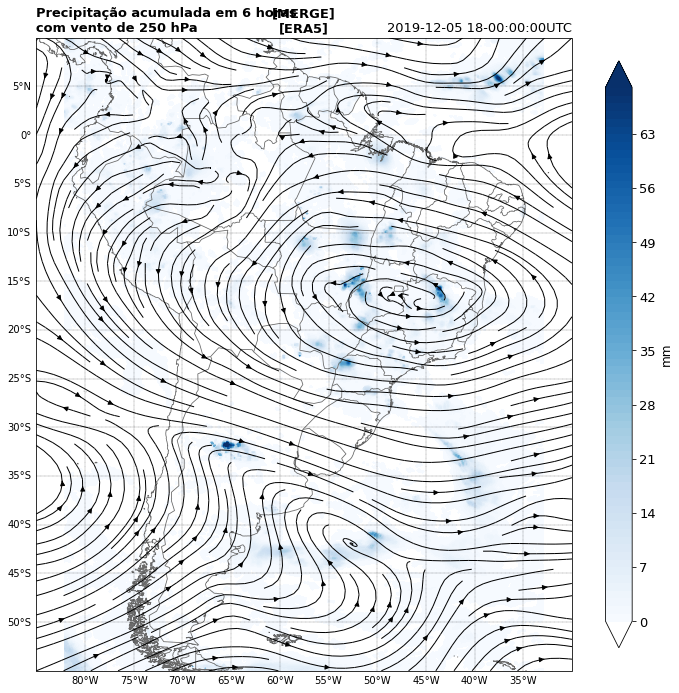

figura 2019-12-05T00:00:00 SALVA!!


In [ ]:
periodos = [6,12,18,00]
for periodo in periodos:
  MERGE(periodo)